## Algumas famílias de distribuições conjulgadas


Na teoria de probability bayesiana, se distribuições posterior p(θ | x) são da mesma família de distribuição de probilidade que  distribuição de probilidade prior p(θ), a prior e posterior são também chamadas de distribuições  conjugadas, e a prior é chamada uma prior conjugada para a função de verossimilhança (likelihood).
[](conjugate_prior_diagram.png)

https://www.johndcook.com/blog/conjugate_prior_diagram/

John Cook apresenta este diagrama incrível em seu website que mostra algumas das distribuições conjulgadas mais usadas.

## Polling

https://nbviewer.jupyter.org/github/clausherther/public/blob/master/Dirichlet%20Multinomial%20Example.ipynb#Polling-#1

In [39]:
import numpy as np
import pandas as pd

import scipy.stats as st
import arviz as az
import numpy as np
import pymc3 as pm
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
y = np.asarray([727, 583, 137])
n = y.sum()
k = len(y)
n, k

(1447, 3)

In [24]:
with pm.Model() as polling_model:

        # initializes the Dirichlet distribution with a uniform prior:
        a = np.ones(k)
        theta = pm.Dirichlet("theta", a=a)

        lula_bolsonaro_diff = pm.Deterministic("lula_bolsonaro_diff", theta[0] - theta[1])

        likelihood  = pm.Multinomial("likelihood", n=n, p=theta, observed=y)
        polling_trace = pm.sample(1000)

<ipython-input-24-ddae8cb5b4cc>:10: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  polling_trace = pm.sample(1000)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 56 seconds.


In [26]:
polling_model

In [27]:
polling_model.check_test_point()

theta_stickbreaking__     -1.50
likelihood              -243.49
Name: Log-probability of test_point, dtype: float64

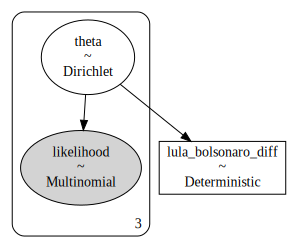

In [28]:
pm.model_to_graphviz(polling_model)

In [29]:
# the trace object
print("polling_trace.varnames {}".format(polling_trace.varnames))

polling_trace.varnames ['theta_stickbreaking__', 'theta', 'lula_bolsonaro_diff']


In [30]:
with polling_model:
    az.plot_trace(polling_trace, combined=True)

In [ ]:
Analisando a % diferença entre respondentes para Lula vs Bolsonaro, nós podemos ver que a maior parte da densidade é maior do que 0%. Isso significa  uma grande vantagem para Lula sobre Bolsonaro nessa pesquisa.

Nós também ajustamos uma distribuição Beta para esses dados via scipy.stats, e nós podemos ver que a posterior dos valores da diferença 
entre 2 theta resulta em uma combinação muito boa.

theta_stickbreaking__     -1.50
likelihood              -243.49
Name: Log-probability of test_point, dtype: float64

In [32]:
print(" Inferida theta {:.2f} np.mean  {:.2f}".format( np.mean(  polling_trace['theta'][1000:]), np.mean(y) ))
print(" Infered lula_bolsonaro_diff {:.2f} np.std  {:.2f}".format(np.mean(polling_trace['lula_bolsonaro_diff'][1000:]) , np.std(y) ))

 Inferida theta 0.33 np.mean  482.33
 Infered lula_bolsonaro_diff 0.10 np.std  251.16


In [33]:
print(pm.summary(polling_trace))

/Users/marcelino/miniconda3/envs/polls/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.


                      mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
theta[0]             0.502  0.013   0.480    0.528        0.0      0.0   
theta[1]             0.403  0.013   0.379    0.427        0.0      0.0   
theta[2]             0.095  0.008   0.081    0.110        0.0      0.0   
lula_bolsonaro_diff  0.099  0.025   0.052    0.145        0.0      0.0   

                     ess_bulk  ess_tail  r_hat  
theta[0]               3381.0    2957.0    1.0  
theta[1]               3462.0    2602.0    1.0  
theta[2]               3275.0    2723.0    1.0  
lula_bolsonaro_diff    3423.0    2968.0    1.0  


In [ ]:
Porcentagem de amostras com lula_bolsonaro_diff > 0:

In [36]:
lula_bolsonaro_diff_perc = len(polling_trace["lula_bolsonaro_diff"][polling_trace["lula_bolsonaro_diff"]>0])/len(polling_trace["lula_bolsonaro_diff"])
      
print(f'P(Mais respondentes para Lula) = {lula_bolsonaro_diff_perc:.0%}')

P(Mais respondentes para Lula) = 100%


In [ ]:
As an extension to the previous model, the authors of BDA include an exercise in chapter 3.10 (Exercise 2) that presents us with polling data from the 1988 Presidential race, taking before and after the one of the debates.

> Comparação de duas observações multinomiais: em outubro de 2021 o presidente Bolsonaro conseguiu aprovar o aumento do benefício ao Auxilio Brasil. Também o ex-ministro Sergio Moro e voltou ao país e em novembro se filiou ao partido Podemos com o interesse de disputar a Presidência. Assim, vamos pegar as pesquisas conduzidas em outubro e em novembro e modelar os dados publicados com duas distribuições multinomiais para j = 1, 2, permitindo que αj seja a parcela de eleitores que preferiu Lula, do total daqueles que tiveram preferência por Lula ou Bolsonaro no momento das pesquisas j

. Plotar um histograma da densidade posterior para α2−α1
. Qual é a probabilidade posterior que haveria uma mudança (aumento de preferência) em direção à Lula?


In [40]:
data = pd.DataFrame([
        {"candidate": "bush", "pre": 294, "post": 288},
        {"candidate": "dukakis", "pre": 307, "post": 332},
        {"candidate": "other", "pre": 38, "post": 10}
       ], columns=["candidate", "pre", "post"])

In [41]:
data

,candidate,pre,post
0,bush,294,288
1,dukakis,307,332
2,other,38,10


In [42]:
y = data[["pre", "post"]].T.values
y
# Number of respondents in each survey

array([[294, 307,  38],
       [288, 332,  10]])

In [43]:
n = y.sum(axis=1) 
n
# Number of respondents for the 2 major candidates in each survey

array([639, 630])

In [44]:
m = y[:, :2].sum(axis=1) 
m

array([601, 620])

In [ ]:
Para este modelo, nós vamos ajustar os valores priors de maneira um pouco diferente. Ao invés de 1 conjunto de thetas, precisamos de 2, um paracada pesquisa (pre/post anúncio). Para fazer isso sem criar versões específicas de variáveis para cada onda pre/post, nós vamos tirar proveito do parametro 'shape' da biblioteca PyMC3, disponível para grande maioria das distribuições.

In this case, we'll need a 2-dimensional shape parameter, representing the number of debates n_debates and the number of choices in candidates n_candidates

In [ ]:
n_debates, n_candidates = y.shape
n_debates, n_candidates

In [ ]:
Thus, we need to initialize a Dirichlet distribution prior with shape (2,3) and then refer to the relevant parameters by index where needed.

In [ ]:
with pm.Model() as polling_model_debates:
    
    # initializes the Dirichlet distribution with a uniform prior:
    shape = (n_debates, n_candidates)
    a = np.ones(shape)
    
    # This creates a separate Dirichlet distribution for each debate
    # where sum of probabilities across candidates = 100% for each debate
    theta = pm.Dirichlet("theta", a=a, shape=shape)
    
    # get the "Bush" theta for each debate, at index=0
    bush_pref = pm.Deterministic("bush_pref", theta[:, 0] * n / m)
    
    # to calculate probability that support for Bush shifted from debate 1 [0] to 2 [1]
    bush_shift = pm.Deterministic("bush_shift", bush_pref[1]-bush_pref[0])
    
    # because of the shapes of the inputs, this essentially creates 2 multinomials, 
    # one for each debate
    responses = pm.Multinomial("responses", n=n, p=theta, observed=y)

In [ ]:
For models with multi-dimensional shapes, it's always good to check the shapes of the various parameters before sampling:

In [ ]:
for v in polling_model_debates.unobserved_RVs:
    print(v, v.tag.test_value.shape)

In [ ]:
pm.model_to_graphviz(polling_model_debates)

In [ ]:
Let's sample with a slightly higher number of draws and tuning steps:

In [ ]:
with polling_model_debates:
    polling_trace_debates = pm.sample(draws=3000, tune=1500)

In [ ]:
with polling_model_debates:
    pm.traceplot(polling_trace_debates, combined=True)

In [ ]:
We'll take a look at the means of the posteriors for theta, indicating the % of support for each candidate pre & post debate:

In [ ]:
s = ["pre", "post"]
candidates = data["candidate"].values
pd.DataFrame(polling_trace_debates["theta"].mean(axis=0), index=s, columns=candidates)

In [ ]:
Just from the means, we can see that the number of Bush supporters has likely decreased post debate from 48.8% to 46.3% (as a % of supporters of the 2 major candidates):

In [ ]:
pd.DataFrame(polling_trace_debates["bush_pref"].mean(axis=0), index=s, columns=["bush_pref"])

In [ ]:
Let's compare the results visually, by plotting the posterior distributions of the pre/post debate values for % responses for Bush and the posterior for pre/post difference in Bush supporters:

In [ ]:
_, ax = plt.subplots(2,1, figsize=(10, 10))

sns.distplot(polling_trace_debates["bush_pref"][:,0], hist=False, ax=ax[0], label="Pre-Debate")
sns.distplot(polling_trace_debates["bush_pref"][:,1], hist=False, ax=ax[0], label="Post-Debate")
ax[0].set_title("% Responses for Bush vs Dukakis")
ax[0].set_xlabel("% Responses");

sns.distplot(polling_trace_debates["bush_shift"], hist=True, ax=ax[1], label="P(Bush Shift)")
ax[1].axvline(0, c='g', linestyle='dotted')
ax[1].set_title("% Shift Pre/Prior Debate")
ax[1].set_xlabel("% Shift");

In [ ]:
From the second plot, we can already see that a large portion of the posterior density is below 0, but let's be precise and actually calculate the probability that support shifted towards Bush after the debate:

In [ ]:
perc_shift = (len(polling_trace_debates["bush_shift"][polling_trace_debates["bush_shift"] > 0])
              /len(polling_trace_debates["bush_shift"])
             )
print(f'P(Shift Towards Bush) = {perc_shift:.1%}')

In [ ]:
While that was a sort of round-about way to show that Bush lost support during the debate, hopefully this illustrated the flexibility and robustness of probabilistic models (and PyMC3).

In [ ]:
with pm.Model() as polling_model_debates:
    
    # initializes the Dirichlet distribution with a uniform prior:
    shape = (n_debates, n_candidates)
    a = np.ones(shape)
    n = np.reshape(n, (-1,1))
    
    # This creates a separate Dirichlet distribution for each debate
    # where sum of probabilities across candidates = 100% for each debate
    theta = pm.Dirichlet("theta", a=a, shape=shape)
    
    # get the "Bush" theta for each debate, at index=0
    bush_pref = pm.Deterministic("bush_pref", theta[:, 0] * n / m)
    
    # to calculate probability that support for Bush shifted from debate 1 [0] to 2 [1]
    bush_shift = pm.Deterministic("bush_shift", bush_pref[1]-bush_pref[0])
    
    # because of the shapes of the inputs, this essentially creates 2 multinomials, 
    # one for each debate
    responses = pm.Multinomial("responses", n=n, p=theta, observed=y)

In [ ]:
import datetime
import pymc3 as pm
from pyhoshen import israel
forecast_day = datetime.datetime.fromordinal(datetime.date.today().toordinal())
with pm.Model() as model:
  election = israel.IsraeliElectionForecastModel(
      'https://drive.google.com/uc?id=1WYGgC3LeTkwKz0Oc2IYX5OdnyiroSA9P',
      model_type='polls-only', base_elections=[],
      forecast_day=forecast_day, eta=25)

In [ ]:
The results can then be plotted as follows:

import theano
theano.config.compute_test_value = 'off'
bo=election.compute_trace_bader_ofer(samples['support'], threshold=0.0325)
election.plot_mandates(samples, bo, hebrew=False)
election.plot_party_support_evolution_graphs(samples, bo, hebrew=False)

In [ ]:
json document with configuration (this is the file provided in the above code):
https://drive.google.com/open?id=1WYGgC3LeTkwKz0Oc2IYX5OdnyiroSA9P 1
google spreadsheet with polls data -
https://docs.google.com/spreadsheets/d/1lqqrIp_sXir_Sz_H_y3mCvOaXGc_lmSsPaD-Y0C9eBk 

In [ ]:
# https://discourse.pymc.io/t/help-with-mvstudentt-mvnormal-political-election-model/2855/3

import datetime
import pymc3 as pm
import numpy as np
import theano.tensor as T
import itertools

forecast_day = datetime.datetime.fromordinal(datetime.date.today().toordinal())

from pyhoshen import configuration
config = configuration.Configuration('https://drive.google.com/uc?id=1WYGgC3LeTkwKz0Oc2IYX5OdnyiroSA9P')

cycle = max(config['cycles'])
cycle_config = config['cycles'][cycle]

parties = cycle_config['parties']
party_unions = { p: parties[p]['union_of'] for p in parties if 'union_of' in parties[p] }
for composite, components in party_unions.items():
    for c in components:
        if c != composite and c in parties:
            del parties[c]

for p in [ id for id, party in parties.items() if 'dissolved' in party ]:
    del parties[p]

config.read_polls(cycle_config, {'polls0': cycle_config['polls'][0]})

# only model support going back this amount of days
# earlier polls are ignored
total_days = 35

from pyhoshen import polls
election_polls = polls.ElectionPolls(
    config.dataframes['polls']['polls0'],
    parties.keys(), forecast_day, max_days = total_days)
  
test_results = [ np.nan_to_num(f) for f in election_polls.get_last_days_average(10)]

num_parties = len(parties.keys())

with pm.Model() as model:
  
  eta = 25
  cholesky_pmatrix = pm.LKJCholeskyCov('cholesky_pmatrix',
      n=num_parties, eta=eta,   
      sd_dist=pm.HalfCauchy.dist(0.1, shape=[num_parties]))
  cholesky_matrix = pm.Deterministic('cholesky_matrix',
      pm.expand_packed_triangular(num_parties, cholesky_pmatrix))
  
  votes = pm.Uniform('votes', 0, 0.5, shape=num_parties)
  
  innovations = pm.MvNormal('innovations',
      mu=np.zeros([total_days, num_parties]),
      chol=cholesky_matrix,
      shape=[total_days, num_parties],
      testval=np.zeros([total_days, num_parties])) 
  
  walk = pm.Deterministic('walk', T.cumsum(innovations, axis=0))
  
  support = pm.Deterministic('support', votes + walk)
  
  # group polls by number of days
  group_key = lambda poll: poll.num_poll_days
  
  grouped_polls = [ (num_days, [p for p in polls]) for num_days, polls in
      itertools.groupby(sorted(election_polls, key=group_key), group_key) ]
  
  # compute average of modeled support for multi-day polls
  def expected_poll_outcome(p):
      if p.num_poll_days > 1:
          return T.mean([ support[d] for d in range(p.end_day, p.start_day + 1)], axis=0)
      else:
          return support[p.start_day]

  likelihoods = [ pm.MvStudentT('polls_%d_days' % num_days,
    nu=[ p.num_polled - 1 for p in polls ],
    mu=[ expected_poll_outcome(p) for p in polls ],
    chol=cholesky_matrix / np.sqrt(num_days),
    testval=test_results,
    shape=[len(polls), num_parties],
    observed=[ p.percentages for p in polls ]) for num_days, polls in grouped_polls ]

with model:
  samples = pm.sample(1000, tune=1000,
                        nuts_kwargs=dict(target_accept=.8, max_treedepth=25, integrator='three-stage'))

In [ ]:
polls = ma.masked_invalid(np.full([max_polls, num_days], np.nan))
    num_polled = ma.masked_equal(np.full([max_polls, num_days], -1).astype(int), -1)
    pollers = np.full([max_polls, num_days], num_pollers).astype(int)
# read poll data ...
    with pm.Model() as poll_model:
        prior = pm.Uniform('p', 0, 1.0, shape = 1)
        sigma = pm.Exponential('sigma', 1./.2, testval=.1) # No more than 20% avg
        s = pm.GaussianRandomWalk('s', sd=sigma**-2, shape=num_days)

        # Margin of error prior
        sigma2 = pm.Uniform('margin_of_error',lower = 0, upper = .5, shape=num_pollers + 1, testval=.05)

        # Deterministic formula for mu
        mu = pm.Deterministic('mu',prior + s)

        # Likelihood function
        poll = pm.Normal('Likelihood', mu=mu, sd=sigma2[pollers], observed=polls)





I am now trying to add covariance and multiple parties based on posts like https://austinrochford.com/posts/2015-09-16-mvn-pymc3-lkj.html 2. But I keep getting dimension issues:


    with pm.Model() as poll_model:
        prior = pm.Uniform('p', 0, 1.0, shape = [num_parties])

        party_s_corr = pm.Lognormal('s_corr', 
                              np.zeros(num_parties), 
                              np.ones(num_parties), shape=num_parties)
        party_corr_lkj = pm.LKJCorr('corr_lkj', n=1, p=num_parties)

        party_corr_matrix = party_corr_lkj[party_tri_index]
        party_corr_matrix = T.fill_diagonal(party_corr_matrix, 1)
        party_s_diag = T.diag(party_s_corr)
        
        party_cov_matrix = T.nlinalg.matrix_dot(party_s_diag, party_corr_matrix, party_s_diag)
        
        s = pm.MvGaussianRandomWalk('s', cov=party_cov_matrix, 
                                    shape=[num_days, num_parties])
#        
        # Margin of error prior
        sigma2 = pm.Uniform('margin_of_error',lower = 0, upper = .5, 
                            shape=num_pollers + 1, testval=.05)
#
        # Deterministic formula for mu
        mu = pm.Deterministic('mu',prior + s)

In [ ]:
https://discourse.pymc.io/t/partial-pooling-for-election-polls/6461/9

My idea is that the true vote share for the state is unobservable, but each poll can give us a glimpse. However each poll should have its own distribution for house effects or sample bias or whatever. Similar to the Efron and Morris baseball example where each player has their own distribution that informs the distribution of the population of professional baseball players.

samplesize = [605, 1250, 500, 800, 1377, 1450, 583, 1064, 300, 1500]
num_votes = [296, 631, 247, 404, 703, 717, 312, 499, 143, 734]


with pm.Model() as warnock_model:
    
    phi = pm.Beta('phi', alpha=alpha, beta=beta)

    kappa_log = pm.HalfNormal('kappa_log', sigma=1)
    kappa = pm.Deterministic('kappa', tt.exp(kappa_log))

    thetas = pm.Beta(
        'thetas', 
        alpha=phi*kappa, 
        beta=(1.0-phi)*kappa, 
        shape=len(num_votes)
    )
    
    y = pm.Binomial(
        'y', 
        n=samplesize, 
        p=thetas, 
        observed=num_votes
    )
